## 建立神經網路

In [4]:
def func(x):
    return x ** 2

In [5]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [6]:
def tfunc(f, x, t):
    d= dfunc(f,x)
    y= f(x)-d*x
    return d * t + y

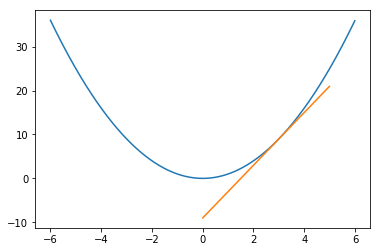

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-6,6, 0.01)
y= func(x)
plt.plot(x,y)
x2= np.arange(0,5, 0.01)
y2= tfunc(func, 3, x2)
plt.plot(x2, y2)

In [8]:
dfunc(func, 3)

6.000000000012662

In [9]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):
    x = init_x
    res = [x]
    for i in range(epochs):
        grad = dfunc(func,x)
        x = x - grad * lr
        res.append(x)
    return np.array(res)

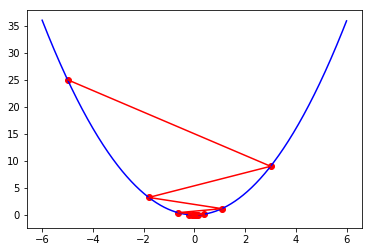

In [10]:
x = gradient_descent(func, -5, lr=0.8)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')
plt.show()

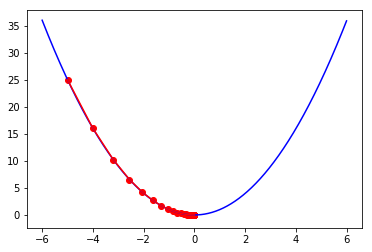

In [11]:
x = gradient_descent(func, -5, lr=0.1)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')
plt.show()

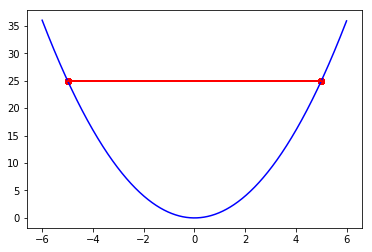

In [12]:
x = gradient_descent(func, -5, lr=1)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')
plt.show()

## 建立類別

In [18]:
class Dog:
    def __init__(self, name, breed):
        self.name = name
        self.breed = breed
    def eat(self):
        print(self.name, ' is eating')

cutie = Dog(name='cutie', breed = '馬爾紀思')
Max = Dog(name='Max', breed = '警犬')


In [19]:
cutie.name

'cutie'

In [20]:
cutie.breed

'馬爾紀思'

In [21]:
cutie.eat()

cutie  is eating


## 訓練神經網路

In [92]:

import numpy as np
def  softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

In [93]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [140]:
import numpy as np

def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))


class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [141]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [142]:
from sklearn.datasets import load_iris
iris = load_iris()

In [143]:
x= iris.data

In [144]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [145]:
y = np.zeros((len(iris.target), 3))

In [146]:
#y

In [147]:
# one-hot encoding
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [148]:
#y

In [149]:
epochs = 3000
lr     = 0.01
train_loss = []
for i in range(epochs):
    grad = net.numerical_gradient(x,y)
    #print(grad)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)

Text(0.5,1,'Training Loss')

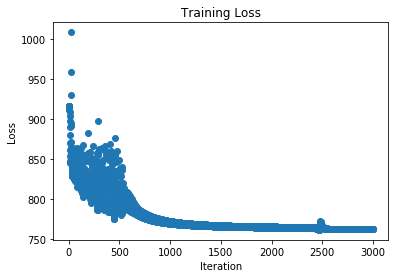

In [150]:
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [151]:
#net.predict(x)

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix
predicted = np.argmax(net.predict(x), axis=1)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [153]:
sum(iris.target == predicted) / len(iris.target)

0.98

## 批次學習

In [154]:
def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size


In [155]:
np.random.choice([1,2,3,4,5],3)

array([2, 4, 2])

In [156]:
import time

net = ANN(input_size=4, hidden_size=5, output_size=3)

epochs      = 3000
lr          = 0.01
batch_size  = 30

train_loss = []

t0 = time.clock()
for i in range(epochs): 
    idx       = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.numerical_gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)

time.clock() - t0

7.999516989798315

Text(0.5,1,'Training Loss')

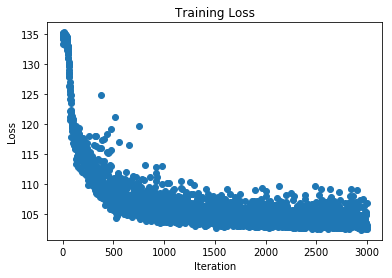

In [135]:
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [137]:
predicted = np.argmax(net.predict(x), axis = 1)

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(iris.target,predicted)

0.98

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(iris.target,predicted)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  2, 48]], dtype=int64)

## 反向傳播
- http://www.wolframalpha.com/input/?i=derivative+1%2Fx

In [157]:
class Relu:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        self.cache = (x <=0)
        out = np.maximum(0,x)
        return out

    def backward(self, dout):
        dout[self.cache] = 0
        dx = dout
        return dx


In [159]:
a = Relu()
print(a.cache)
x = np.array([-1,1,2])
print(a.forward(x))
print(a.cache)

None
[0 1 2]
[ True False False]


In [161]:
y = np.array([2,3,4])
print(a.backward(y))

[0 3 4]


In [164]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1/ (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        y  = self.out
        dx = dout * y * (1-y)
        return dx


In [167]:
s = Sigmoid()
print(s.out)
x = np.array([-1,1,2])
print(s.forward(x))
print(s.out)

None
[0.26894142 0.73105858 0.88079708]
[0.26894142 0.73105858 0.88079708]


In [168]:
y = np.array([2,3,4])
print(s.backward(y))

[0.39322387 0.5898358  0.41997434]


In [169]:
a = np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [170]:
a.T

array([[1, 3],
       [2, 4]])

In [187]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout)
        return dx



In [181]:
x = np.array([5,8])
W = np.array([[0.1,0.2,0.3], [0.4,0.5,0.6]])
b = np.array([0.1,0.1,0.1])
a  = Affine(W, b)
print(a.x)
print(a.forward(x))
print(a.x)

None
[3.8 5.1 6.4]
[5 8]


In [188]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y_hat = None 
        self.y = None 

    def forward(self, x, y):
        self.y = y
        self.y_hat = softmax_function(x)
        self.loss = cross_entropy_err(self.y_hat, self.y)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        dx = (self.y_hat - self.y) / batch_size
        return dx


In [189]:
def softmax_function(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [190]:
def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size

### 建立神經網路模型

In [191]:
import numpy as np
from collections import OrderedDict

class ANN:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return self.lastLayer.forward(y_hat, y)
  
    def gradient(self, x, y):
        # forward
        self.loss(x, y)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

### 讀取數據

In [193]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

### 訓練神經網路

In [199]:
import random
import time

epochs     = 10000
lr         = 0.01
batch_size = 30

net = ANN(input_size=4, hidden_size=5, output_size=3)

t0 = time.clock()
train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
    
time.clock() - t0

1.6016882652784261

Text(0.5,1,'Training Loss')

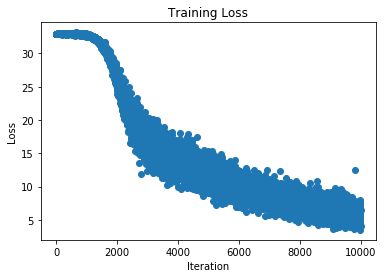

In [200]:
plt.scatter(range(0,10000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [201]:
from sklearn.metrics import accuracy_score, confusion_matrix
x = iris.data
predicted = np.argmax(net.predict(x), axis=1)

# accuracy
sum(predicted == iris.target) / len(iris.target)


0.98

In [202]:

# accuracy
accuracy_score(iris.target, predicted)


0.98

In [203]:

# confusion matrix
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]], dtype=int64)

## 使用 scikit-learn 訓練神經網路

In [204]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing  import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()


In [206]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [208]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [209]:
digits.data.shape

(1797, 64)

In [210]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [211]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [215]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

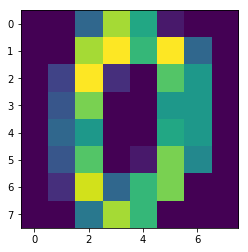

In [216]:
digits.images[0]
plt.imshow(digits.images[0])
#ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')


In [217]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

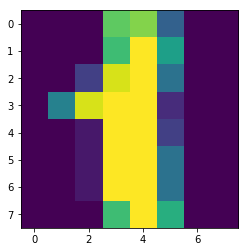

In [218]:
plt.imshow(digits.images[1])

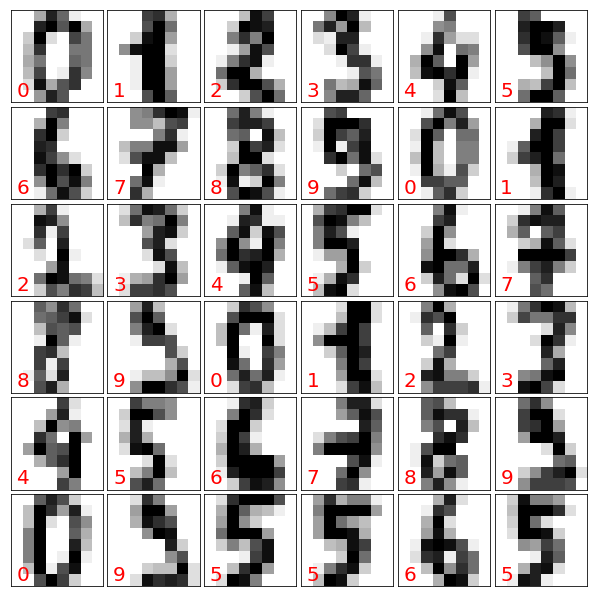

In [219]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)


In [220]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [221]:
scaler = StandardScaler()
scaler.fit(digits.data)
X_scaled = scaler.transform(digits.data)


In [222]:
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [227]:
y = np.zeros((len(digits.target), 10))
for idx, val in enumerate(digits.target):
    y[idx, val] = 1
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

### 土砲版本

In [230]:
import random
import time

epochs     = 30000
lr         = 0.01
batch_size = 100

net = ANN(input_size=64, hidden_size=32, output_size=10)

t0 = time.clock()
train_loss = []
for i in range(epochs): 
    idx = np.random.choice(X_scaled.shape[0], batch_size)
    x_batch   = X_scaled[idx]
    y_batch   = y[idx]
    grad = net.gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
    
time.clock() - t0

13.91696858692012

Text(0.5,1,'Training Loss')

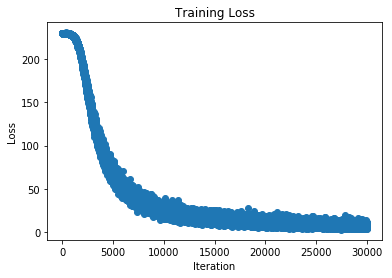

In [232]:
plt.scatter(range(0,30000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [235]:
predicted = np.argmax(net.predict(X_scaled), axis = 1)
predicted

array([0, 1, 2, ..., 8, 9, 8], dtype=int64)

In [237]:
sum(predicted == digits.target) / len(digits.target)

0.9894268224819143

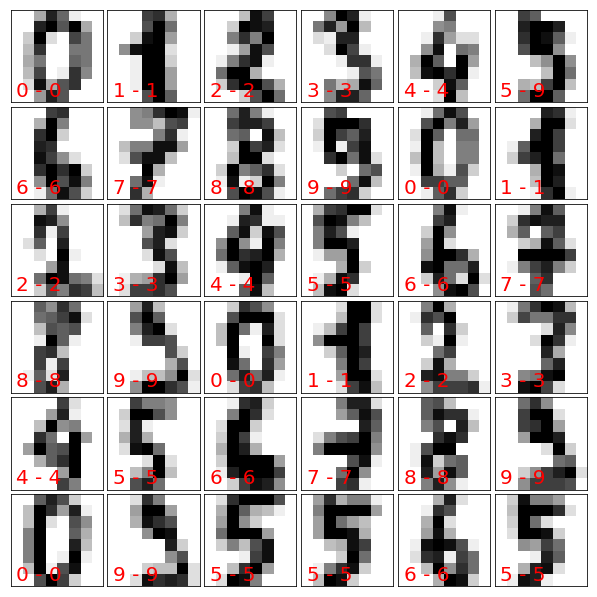

In [238]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, '{} - {}'.format(str(digits.target[i]), predicted[i]), color="red", fontsize = 20)


### Scikit-Learn 版本

In [242]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), 
                    activation='relu', max_iter = 1000, 
                    solver='sgd',learning_rate='constant',
                    learning_rate_init=0.001)

mlp.fit(X_scaled,digits.target)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

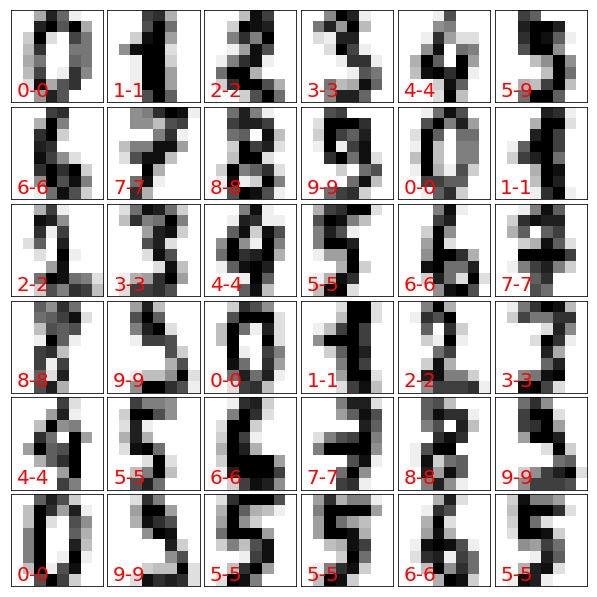

In [243]:
predicted = mlp.predict(X_scaled)
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)


In [244]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(digits.target, predicted)

0.996661101836394

## 破解驗證碼
- http://largitdata.com/course/91
- http://largitdata.com/course/92
- http://largitdata.com/course/93
- http://largitdata.com/course/94